Ce script contient l'analyse exploratoire des fichiers amplicons.

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import scipy as sp
import sklearn.cluster
import tqdm
from scipy.stats import zscore, kstest, kruskal

In [2]:
path = r"C:\Users\ahmed\MFE project"    
df = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("addfeat_Database_Amplicon")>-1][0]))

In [20]:
list(dict.fromkeys(df[df["num2"]== 32]["ordre"]))

[57, 83, 208, 315, 415, 499, 531, 534, 596]

In [23]:
df[(df["num2"]==32) & (df["ordre"]==531)][["type", "date", "classe", "num2"]]

,type,date,classe,num2
79123,CVC,13-04-21,NC,32
79124,CVC,13-04-21,NC,32
79125,CVC,13-04-21,NC,32
79126,CVC,13-04-21,NC,32
79127,CVC,13-04-21,NC,32
...,...,...,...,...
79216,CVC,13-04-21,NC,32
79217,CVC,13-04-21,NC,32
79218,CVC,13-04-21,NC,32
79219,CVC,13-04-21,NC,32


In [7]:
df[df["ordre"]==573][["type", "date", "num2"]]

,type,date,num2
83759,OBL,01-06-21,5
83760,OBL,01-06-21,5
83761,OBL,01-06-21,5
83762,OBL,01-06-21,5
83763,OBL,01-06-21,5
...,...,...,...
83872,OBL,01-06-21,5
83873,OBL,01-06-21,5
83874,OBL,01-06-21,5
83875,OBL,01-06-21,5


In [6]:
len(df[df["classe"]=="NVA"])

9739

In [45]:
list(dict.fromkeys(df[df["classe"]=="NVA"]["ordre"].values))

[4,
 5,
 22,
 28,
 29,
 30,
 31,
 36,
 41,
 50,
 56,
 60,
 85,
 102,
 114,
 115,
 119,
 135,
 136,
 137,
 160,
 167,
 168,
 180,
 181,
 193,
 205,
 206,
 212,
 221,
 230,
 251,
 262,
 265,
 287,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 379,
 381,
 386,
 415,
 418,
 434,
 435,
 449,
 450,
 457,
 478,
 480,
 485,
 493,
 510,
 516,
 520,
 542,
 543,
 544,
 545,
 561,
 562,
 563,
 595,
 597]

In [19]:
%matplotlib
plt.plot(df[(df["classe"]=="OPT") & ((df["cov500_percent"]!=1)&(df["cov500_percent"]!=0))]["cov500_percent"])

Using matplotlib backend: Qt5Agg


In [11]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'contig_id', 'contig_srt', 'contig_end',
       'region_id', 'attributes', 'gc_count', 'overlaps', 'fwd_e2e', 'rev_e2e',
       'total_reads', 'fwd_reads', 'rev_reads', 'cov20x', 'cov100x', 'cov500x',
       'annee', 'type', 'date', 'num', 'classe', 'num2', 'num3', 'ordre',
       'contig_length', 'gc_percent', 'cov20_percent', 'cov100_percent',
       'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent'],
      dtype='object')

In [4]:
df_2class = df[(df["classe"]=="OPT") | (df["classe"]=="NC")]

In [ ]:

New_var = ['contig_length', 'gc_percent', 'cov20_percent', 'cov100_percent',
       'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent', 'classe']
sns.pairplot(df[New_var], hue= 'classe')

In [5]:
type = ["CVC", "OBL", "NDN", "TM", "BAL", "BM"]
classe = ["OPT", "SOPT", "NC", "NVA"]

In [20]:
# df[df["classe"]=="NVA"]["contig_length"].describe()

df["overlaps"].describe()

count    88582.000000
mean      1418.197106
std       1348.447630
min          0.000000
25%        525.000000
50%       1076.000000
75%       1925.000000
max      39513.000000
Name: overlaps, dtype: float64

In [26]:
df[df["classe"]=="NVA"]["overlaps"].describe()

count     9739.000000
mean      2166.071157
std       1780.425713
min          0.000000
25%       1014.000000
50%       1714.000000
75%       2791.500000
max      30562.000000
Name: overlaps, dtype: float64

In [37]:
New_var1 = ['gc_percent', 'cov20_percent', 'cov100_percent',
       'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent']
df_pca = df_2class[New_var1].fillna(0)
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pcaa = pca.fit_transform(df_pca)

In [6]:
# fit sur 2 classes et voir ce qui se passe avec les autres (s'ils se mettent au milieu)

New_var1 = ['gc_percent', 'cov20_percent', 'cov100_percent',
       'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent']

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pcaa = pca.fit(df_2class[New_var1].fillna(0))
df_pca = pca.transform(df[New_var1].fillna(0))

In [7]:
pca.explained_variance_ratio_

array([0.63771156, 0.19726074, 0.07431238, 0.03684738])

In [8]:
dfpca = pd.DataFrame(df_pca)

In [9]:
dfpca.loc[:,"classe"]= df["classe"].values

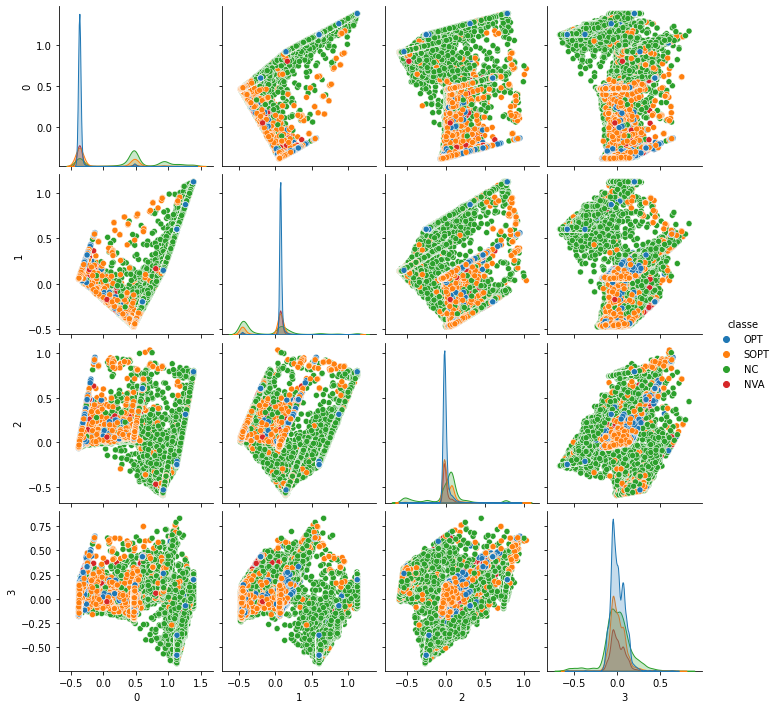

In [20]:
sns.pairplot(dfpca, hue='classe')

In [10]:
dfpca.loc[:, "ordre"] = df["ordre"].values

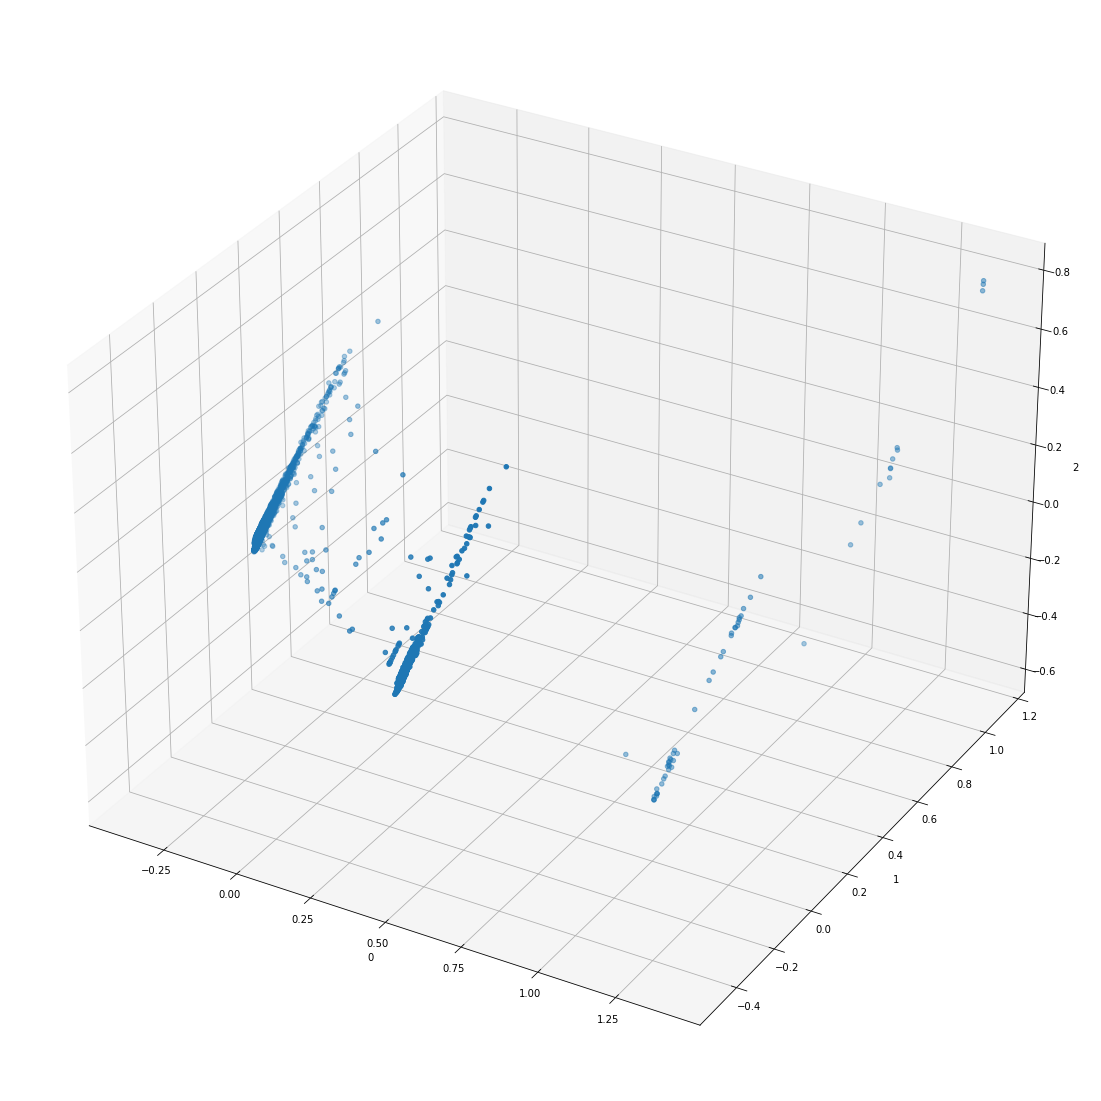

In [44]:
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
axes = [0, 1, 2]
ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.set_zlabel(axes[2])

# ax.scatter3D(dfpca[dfpca["classe"]=="OPT"][axes[0]], dfpca[dfpca["classe"]=="OPT"][axes[1]], dfpca[dfpca["classe"]=="OPT"][axes[2]])
# ax.scatter3D(dfpca[dfpca["classe"]=="NC"][axes[0]], dfpca[dfpca["classe"]=="NC"][axes[1]], dfpca[dfpca["classe"]=="NC"][axes[2]])
# ax.scatter3D(dfpca[dfpca["classe"]=="SOPT"][axes[0]], dfpca[dfpca["classe"]=="SOPT"][axes[1]], dfpca[dfpca["classe"]=="SOPT"][axes[2]])
ax.scatter3D(dfpca[dfpca["classe"]=="NVA"][axes[0]], dfpca[dfpca["classe"]=="NVA"][axes[1]], dfpca[dfpca["classe"]=="NVA"][axes[2]])


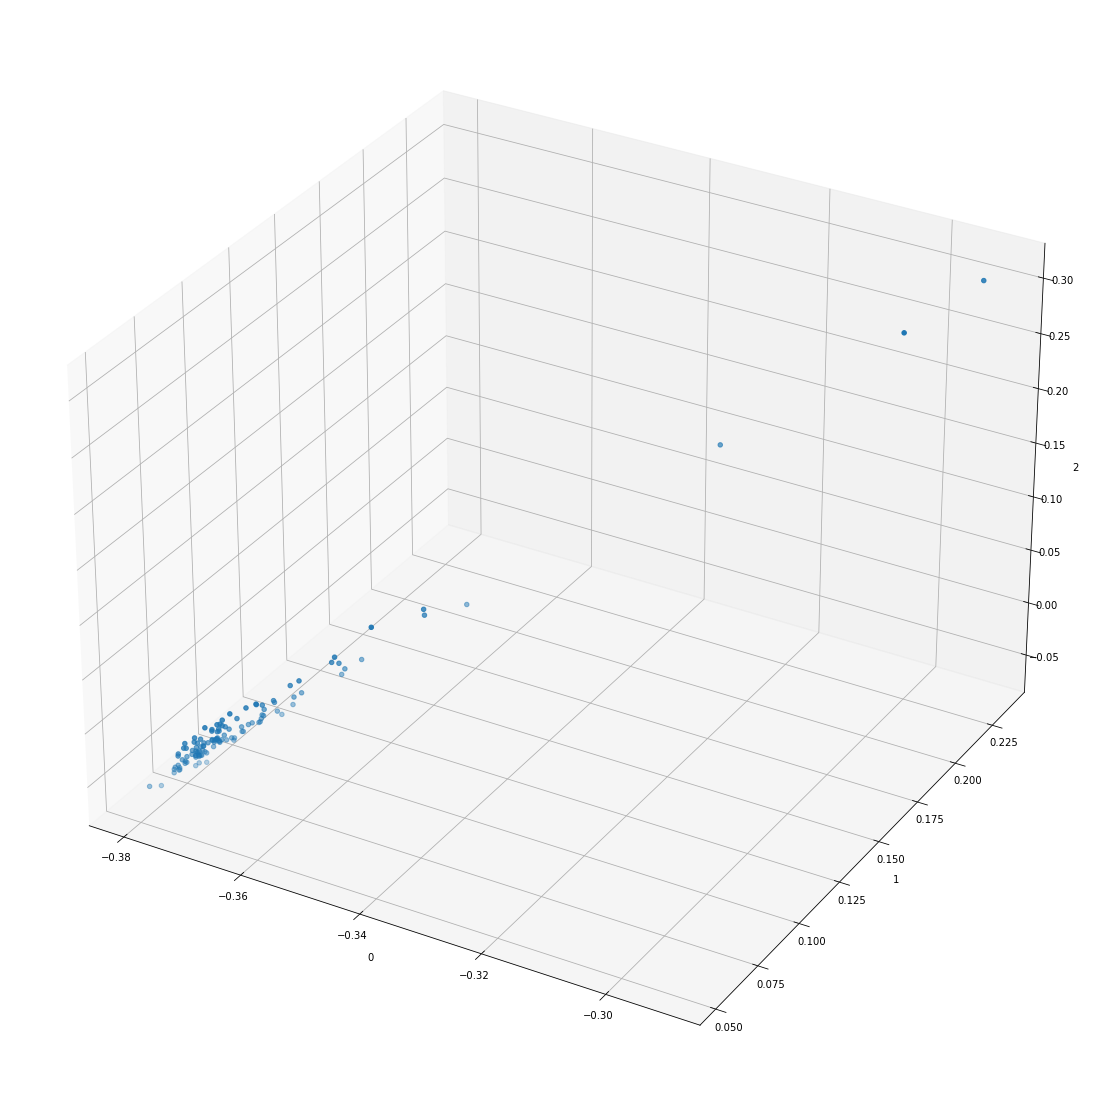

In [52]:
%matplotlib inline
from mpl_toolkits import mplot3d

# le graphe

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
axes = [0, 1, 2]
ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.set_zlabel(axes[2])

# le contenu
clas = "OPT"
ordr = list(dict.fromkeys(dfpca[dfpca["classe"]==clas]["ordre"].values))

df_test = dfpca[dfpca["ordre"]==ordr[nu]]


ax.scatter3D(df_test[axes[0]], df_test[axes[1]], df_test[axes[2]])


In [68]:
%matplotlib
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

axes = [0, 1, 2]

# df_test = dfpca[dfpca["classe"]=="OPT"]
df_test = df_tru

x = df_test[axes[0]]
y = df_test[axes[1]]
z = df_test[axes[2]]

ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.set_zlabel(axes[2])

ax.scatter(x, y, z)

plt.show()

Using matplotlib backend: Qt5Agg


In [12]:
%matplotlib
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

axes = [0, 1, 2]

ax.set_xlabel(axes[0])
ax.set_ylabel(axes[1])
ax.set_zlabel(axes[2])

ax.scatter(dfpca[dfpca["classe"]=="OPT"][axes[0]], dfpca[dfpca["classe"]=="OPT"][axes[1]], dfpca[dfpca["classe"]=="OPT"][axes[2]])
ax.scatter(dfpca[dfpca["classe"]=="NC"][axes[0]], dfpca[dfpca["classe"]=="NC"][axes[1]], dfpca[dfpca["classe"]=="NC"][axes[2]])
ax.scatter(dfpca[dfpca["classe"]=="SOPT"][axes[0]], dfpca[dfpca["classe"]=="SOPT"][axes[1]], dfpca[dfpca["classe"]=="SOPT"][axes[2]])
ax.scatter(dfpca[dfpca["classe"]=="NVA"][axes[0]], dfpca[dfpca["classe"]=="NVA"][axes[1]], dfpca[dfpca["classe"]=="NVA"][axes[2]])

plt.show()

Using matplotlib backend: Qt5Agg


In [ ]:
New_var1 = ['gc_percent', 'cov20_percent', 'cov100_percent',
       'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent']
       
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)

km.fit(df_2class[New_var1].fillna(0))

In [17]:
from joblib import dump, load

# to save the kmeans model
# dump(km, 'kmeans_model_saved.joblib')

# to load the model
# km_loaded = load('kmeans_model_saved.joblib')

clus = km_loaded.predict(df[New_var1].fillna(0))

df_clus= df[New_var1]
df_clus.loc[:,"pred"]= clus
df_clus.loc[:,"classe"]= df["classe"].values
df_clus.loc[:,"ordre"]= df["ordre"].values

In [127]:
dfpca

,0,1,2,3,classe,ordre
0,0.477528,-0.451882,0.087092,0.028618,OPT,0
1,-0.352310,0.075401,-0.002806,-0.079267,OPT,0
2,-0.374876,0.063219,-0.036503,-0.061008,OPT,0
3,-0.367560,0.075059,0.005988,0.062846,OPT,0
4,-0.373899,0.064890,-0.031589,-0.049247,OPT,0
...,...,...,...,...,...,...
88577,-0.376264,0.060880,-0.044941,-0.084912,SOPT,614
88578,-0.379491,0.054368,-0.057666,-0.093405,SOPT,614
88579,-0.374495,0.063956,-0.035595,-0.062268,SOPT,614
88580,-0.377801,0.057602,-0.050055,-0.082083,SOPT,614


In [128]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)

km.fit(dfpca[(dfpca["classe"]=="OPT") | (dfpca["classe"]=="NC")][[0,1,2,3]])
pre = km.predict(dfpca[[0,1,2,3]])

df_cluspca = dfpca
df_cluspca.loc[:,"pred"]= pre

In [129]:
df_cluspca

,0,1,2,3,classe,ordre,pred
0,0.477528,-0.451882,0.087092,0.028618,OPT,0,1
1,-0.352310,0.075401,-0.002806,-0.079267,OPT,0,0
2,-0.374876,0.063219,-0.036503,-0.061008,OPT,0,0
3,-0.367560,0.075059,0.005988,0.062846,OPT,0,0
4,-0.373899,0.064890,-0.031589,-0.049247,OPT,0,0
...,...,...,...,...,...,...,...
88577,-0.376264,0.060880,-0.044941,-0.084912,SOPT,614,0
88578,-0.379491,0.054368,-0.057666,-0.093405,SOPT,614,0
88579,-0.374495,0.063956,-0.035595,-0.062268,SOPT,614,0
88580,-0.377801,0.057602,-0.050055,-0.082083,SOPT,614,0


In [75]:
resultat = []
for i in range(615):
    cla = str(df_clus[df_clus["ordre"]==i]["classe"].values[0])
    longueur = len(df_clus[df_clus["ordre"]==i]["pred"].values)
    clu2 = df_clus[df_clus["ordre"]==i]["pred"].values.sum()
    clu1 = longueur - clu2
    clu2_percent = clu2/longueur
    clu1_percent = clu1/longueur
    df_res = pd.DataFrame([[int(i), cla, int(longueur), int(clu1), int(clu2), float(clu1_percent), float(clu2_percent)]], columns=["ordre", "classe", "longueur", "cluster1", "cluster2", "cluster1_percent", "cluster2_percent"])
    resultat.append(df_res)
df_resul = pd.concat(resultat)

In [138]:
resultatPCA = []
for i in range(615):
    cla = str(df_cluspca[df_cluspca["ordre"]==i]["classe"].values[0])
    longueur = len(df_cluspca[df_cluspca["ordre"]==i]["pred"].values)
    clu2 = df_cluspca[df_cluspca["ordre"]==i]["pred"].values.sum()
    clu1 = longueur - clu2
    clu2_percent = clu2/longueur
    clu1_percent = clu1/longueur
    df_res = pd.DataFrame([[int(i), cla, int(longueur), int(clu1), int(clu2), float(clu1_percent), float(clu2_percent)]], columns=["ordre", "classe", "longueur", "cluster1PCA", "cluster2PCA", "cluster1PCA_percent", "cluster2PCA_percent"])
    resultatPCA.append(df_res)
df_resulPCA = pd.concat(resultatPCA)

In [143]:
df_resul.loc[:,"cluster1PCA"] = df_resulPCA["cluster1PCA"]
df_resul.loc[:,"cluster2PCA"] = df_resulPCA["cluster2PCA"]
df_resul.loc[:,"cluster1PCA_percent"] = df_resulPCA["cluster1PCA_percent"]
df_resul.loc[:,"cluster2PCA_percent"] = df_resulPCA["cluster2PCA_percent"]

In [147]:
# df_resul.to_csv("results_global_clustering.csv")

In [133]:
df_resul[df_resul["classe"]=="NC"]

,ordre,classe,longueur,cluster1,cluster2,cluster1_percent,cluster2_percent
0,3,NC,118,11,107,0.093220,0.906780
0,10,NC,98,40,58,0.408163,0.591837
0,11,NC,98,0,98,0.000000,1.000000
0,17,NC,207,1,206,0.004831,0.995169
0,21,NC,207,0,207,0.000000,1.000000
...,...,...,...,...,...,...,...
0,578,NC,98,13,85,0.132653,0.867347
0,579,NC,98,0,98,0.000000,1.000000
0,583,NC,98,22,76,0.224490,0.775510
0,599,NC,98,0,98,0.000000,1.000000


In [137]:
df_resul[(df_resul["classe"]=="NC") & (df_resul["cluster1_percent"]>0.60)]

,ordre,classe,longueur,cluster1,cluster2,cluster1_percent,cluster2_percent
0,573,NC,118,117,1,0.991525,0.008475


In [126]:
sns.boxplot(data=df_resul, x="classe", y="cluster1_percent")

<AxesSubplot:xlabel='classe', ylabel='cluster1_percent'>

In [122]:
len(df_resul[(df_resul["classe"]=="NVA") & (df_resul["cluster1_percent"]<0.8)])

3

In [4]:
df[df["ordre"]==573].describe()

,Unnamed: 0,Unnamed: 0.1,contig_srt,contig_end,gc_count,overlaps,fwd_e2e,rev_e2e,total_reads,fwd_reads,...,num2,num3,ordre,contig_length,gc_percent,cov20_percent,cov100_percent,cov500_percent,fwd_e2e_percent,rev_e2e_percent
count,118.000000,118.000000,1.180000e+02,1.180000e+02,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.0,118.0,118.0,118.000000,118.000000,118.0,118.0,118.000000,118.000000,118.000000
mean,83817.500000,83817.500000,8.864525e+07,8.864537e+07,58.389831,2649.389831,1234.805085,1163.796610,2498.983051,1288.288136,...,5.0,688.0,573.0,119.330508,0.488742,1.0,1.0,0.991084,0.957398,0.958083
std,34.207699,34.207699,6.514258e+07,6.514258e+07,18.381073,1480.450417,641.791207,601.645458,1235.426768,664.508624,...,0.0,0.0,0.0,25.346169,0.111457,0.0,0.0,0.092141,0.038778,0.055085
min,83759.000000,83759.000000,5.334350e+05,5.336220e+05,19.000000,410.000000,168.000000,183.000000,410.000000,178.000000,...,5.0,688.0,573.0,52.000000,0.250000,1.0,1.0,0.000000,0.723817,0.543027
25%,83788.250000,83788.250000,3.798153e+07,3.798165e+07,44.500000,1733.250000,789.500000,764.750000,1704.000000,817.000000,...,5.0,688.0,573.0,106.000000,0.406150,1.0,1.0,1.000000,0.957135,0.959111
50%,83817.500000,83817.500000,7.817581e+07,7.817591e+07,57.000000,2184.000000,1093.000000,1024.500000,2164.000000,1152.500000,...,5.0,688.0,573.0,117.500000,0.471689,1.0,1.0,1.000000,0.964632,0.969443
75%,83846.750000,83846.750000,1.393989e+08,1.393991e+08,68.750000,3344.750000,1540.500000,1445.250000,3170.750000,1615.750000,...,5.0,688.0,573.0,129.000000,0.586525,1.0,1.0,1.000000,0.974690,0.977393
max,83876.000000,83876.000000,2.128121e+08,2.128122e+08,119.000000,8681.000000,3335.000000,3397.000000,6535.000000,3437.000000,...,5.0,688.0,573.0,188.000000,0.756098,1.0,1.0,1.000000,0.993529,0.987722


In [152]:
df

,Unnamed: 0,Unnamed: 0.1,contig_id,contig_srt,contig_end,region_id,attributes,gc_count,overlaps,fwd_e2e,...,num2,num3,ordre,contig_length,gc_percent,cov20_percent,cov100_percent,cov500_percent,fwd_e2e_percent,rev_e2e_percent
0,0,0,19,1221237,1221332,CHP2_STK11_4,GENE_ID=STK11;Pool=1,58,140,68,...,7,83,0,96,0.604167,1.0,1.0,0.000000,0.971429,0.942857
1,1,1,10,89711805,89711932,CHP2_PTEN_4,GENE_ID=PTEN;Pool=1,43,534,258,...,7,83,0,128,0.335938,1.0,1.0,0.984375,0.966292,0.906367
2,2,2,1,162745448,162745576,ON_DDR2_7,GENE_ID=DDR2;Pool=1,52,593,360,...,7,83,0,129,0.403101,1.0,1.0,1.000000,0.983607,0.964758
3,3,3,17,7577016,7577151,CHP2_TP53_7,GENE_ID=TP53;Pool=1,80,623,283,...,7,83,0,136,0.588235,1.0,1.0,1.000000,0.952862,0.947853
4,4,4,3,178938788,178938918,CHP2_PIK3CA_8,GENE_ID=PIK3CA;Pool=1,55,746,339,...,7,83,0,131,0.419847,1.0,1.0,1.000000,0.971347,0.969773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88577,88577,88577,2,212652720,212652806,CHP2_ERBB4_2,GENE_ID=ERBB4;Pool=1,32,1825,741,...,48,636,614,87,0.367816,1.0,1.0,1.000000,0.972441,0.984008
88578,88578,88578,10,89720696,89720747,CHP2_PTEN_7,GENE_ID=PTEN;Pool=1,19,2045,1056,...,48,636,614,52,0.365385,1.0,1.0,1.000000,0.994350,0.987780
88579,88579,88579,7,116423408,116423492,CHP2_MET_6,GENE_ID=MET;Pool=1,34,2065,1289,...,48,636,614,85,0.400000,1.0,1.0,1.000000,0.964820,0.979424
88580,88580,88580,4,153250853,153250926,CHP2_FBXW7_2,GENE_ID=FBXW7;Pool=1,28,2161,1049,...,48,636,614,74,0.378378,1.0,1.0,1.000000,0.986830,0.982696


In [30]:
clas = df_clus["classe"].values
val = []
for i in range(len(clas)):
    if clas[i] == "OPT":
        val.append(1)
    if clas[i] == "NC":
        val.append(0)

val2=[]
for i in range(len(clas)):
    if clas[i] == "OPT":
        val2.append(0)
    if clas[i] == "NC":
        val2.append(1)


In [31]:
df_clus.loc[:,"class_bin2"] = val2

In [34]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(df_clus["class_bin2"], df_clus["pred"], normalize="true", labels=[0,1])

confusion_matrix(df_clus["class_bin2"], df_clus["pred"], labels=[0,1])

array([[32664,   778],
       [ 6030, 20904]], dtype=int64)

In [89]:
# 0 correspond à OPT (il y a bcp plus de OPT dans le cluster 0 que 1)
len(df_clus[df_clus["pred"]==1][df_clus["classe"]=="NC"])

C:\Users\ahmed\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


20904

<AxesSubplot:xlabel='cov500_percent', ylabel='rev_e2e_percent'>

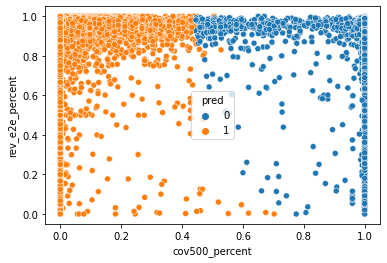

In [38]:
sns.scatterplot(data=df_clus, x="cov500_percent", y="rev_e2e_percent", hue="pred")

<AxesSubplot:xlabel='cov500_percent', ylabel='rev_e2e_percent'>

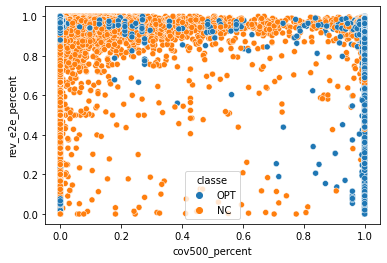

In [40]:
sns.scatterplot(data=df_clus, x="cov500_percent", y="rev_e2e_percent", hue="classe")

In [33]:
len(df_clus[df_clus["classe"]=="OPT"])

33442

In [129]:
# len opt: 33442
# len nc: 26934

tot = 33442+26934
26934/tot

0.44610441234927783

In [131]:
pred_pca = km.fit_predict(dfpca[[0,1,2,3]])

In [133]:
# 1: NC; 0:OPT
confusion_matrix(df_clus["class_bin2"], pred_pca, normalize="true")

array([[0.97673584, 0.02326416],
       [0.2238806 , 0.7761194 ]])